In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


# Learning outcomes

Throughout this course we will cover:
- Quick introduction on the different types of Machine Learning/AI use cases
- What is regression and where can it be applied ?
- Various techniques to perform regression modeling including linear and non-linear and why it matters for modeling
- Python libraries in our toolbox
- Object orientation for the simple case of our project
- Facts about the dataset we will be working with some exploratory data analysis to help us understand it
- Visualization of relationships between variables
- Evaluation and model diagnostics

# Introduction

Machine Learning and AI has picked up in the last decade as we have generated exponentially more data leading to the surge in demand to make sense of complex relationships found within. 

![alt text](./imgs/global-data-generated-annually.png "Title")

<center>Global data generated in recent and coming years<a href="https://explodingtopics.com/blog/data-generated-per-day"><sup>[1]</sup></a> </center>

With an ever increasing amount of data, we require more automation of processes to handle information and in the process it has enabled us to effectively do a few new things:
1. Automated labeling of incoming new data (Classification)
2. Content generation (Generative Models)
3. Value estimation (Regression Models)

## Automated labeling of incoming new data (Classification)

The first one is referred to as "classification" in the Machine Learning literature. Given a new data point we want our algorithm to describe to us in an instant which of the pre-defined classes it belongs to. Picture a scenario of you wanting to be able to automatically label gooseberries and watermellons. You would gather data on your fruits such as width and heigth together with your knowledge of what fruit each pair of width and height is. You would then present this data to the algorithm and train it so it can learn these relationships.

This technique belongs to the 'supervised learning' category, where models are simultaniously shown data with the attached label (category) they belong to in order to learn what are the distinct features of the classes.
![alt text](./imgs/classification.png "Gooseberry vs watermellons")

Our simplistic model assumes the entire universe only consists of watermellons which are big and gooseberries which are small. The variables sufficient for this type of model would be the height and width of the fruits. With only two variables, we wouldn't need too many examples of them to train a model to learn the difference between "small" and "big". 

Classification techniques assigning a label to a data point from a fixed-set, for example {0,1) where 0 is our "gooseberry" and 1 is our "watermellon".

Example real world use-cases:
- Credit scoring models - will this customer pay us back in the future ? (binary classification)
- Is this device operating correctly ? (binary classification)
- Image based automated produce classification on check-outs in supermarkets (multiclass)
- Image based plant/mushroom identification (multiclass)

and many more...

## Content generation (Generative Models)

Models trained on huge text sets are capable of doing amazing things. You have most likely by now heard about Chat GPT and its amazing features to generate text, provide advice, help out with technical tasks among others. The same goes for images - <a href="https://thispersondoesnotexist.com/">This person does not exist</a> which allows you to generate images of faces of people who as the title suggest - are not real. To capture the facial features and be able to generate new ones requires working on large matrixes, large datasets and sufficient computational power. 

Below, a sample output from the website:

<img src="./imgs/thispersondoesnotexist.jpg" alt="Drawing" style="width: 400px;"/>


Example use-cases around generative AI involves:
- Content creation for marketing campaigns
- In-game content (models, textures...)
- Writing emails
- Improving existing code
- Transfering styles between art and images


and many more ...

## Value estimation (Regression Models)

Imagine yourself in need of telling aproximately how many kg each one of your watermellons have. Your friend only allows you to borrow his/her scale for a limited amount of time. What do you do? You take notes on width and height(data) of each watermellon and weigh it on the scale (true values). Once your time is out and your friend needs the scale back, you are left with a table of width, height and the corresponding weight of each of your watermellons.  Hopefully you can see that the building blocks for this are not that dissimiliar from classification problems and regression modelling is another example of 'supervised learning' .

Instead of assigning a datapoint (width,height) to a class (discrete number) (0 for "gooseberry" and 1 for "watermellon") we want to get a continuous value of its weight in kg, thus replacing the scale we no longer have access too and which can be assumed to be a equivalent of "manual labour".

<img src="./imgs/regression_1.png" alt="Drawing" style="width: 400px;"/>

This class will focus on how to build such models, but instead of fruits we will be dealing with something more complex and therefore also more exciting - apartment prices. However to inspire you here are as usually some more use-cases:
- Estimating remaining useful lifetime on machine components
- Price elasticity modeling
- Stock price predictions
- Sales forecasting

and as always - many more ...

# Oreilly - part I 

# Formalizing Regression

## Terms and nomenclature

$X$ - are our so called "independent variables" which are values we collect throughout our studies (width/height) in the watermellon examples above. Often referred to as "variables" (of a model). 

$y$ - is the "dependent variable" which is the one we want our model to predict. It "depends" on what the inputs to the model are - our $X$'s. In the example of the watermellon case it would be the true watermellon weight that we measured using the scale when collecting our data. Commonly referred to as the "target variable".

$\hat{y}$ - Pronounced as "y-hat", is the value estimated(predicted) by our model(s). It differs from the true value $y$ in the sense that it is not the objective reality, but the subjective estimate of the model. In our watermellon-case this would be the values we predicted using our model once we had to hand back the scale to our friend. These are commonly (and for avery good reason) referred to as "predicted values".

$\beta_0$ ... $\beta_n$ - regression coefficients. Those are values estimated by model(s) that indicate how to transform the input variables ($X$) to make correct predictions. We will return to this after we introduce Linear Regression below.

Picture this example again:

<img src="./imgs/regression_1.png" alt="Drawing" style="width: 400px;"/>

Somehow the model had to arrive at 10.65 kg. This was done by having a constant value $\beta_0$ added to a coefficient $\beta_1$ multiplied with the measured $width$ added with the multiplied  $\beta_2$ times the measured $height$ 

In "mathematician" this is:

$\hat{y}$ = $\beta_0$ + $\beta_1$ * $width$ + $\beta_2$ * $height$

## Linear regression and Least Square Method

For simplicity and ease of visualizing, let's assume that instead of width and height, we only collect one of the two - the width. We therefore have one variable that we will use to predict the weight. By doing this we make a (reasonable) assumption that the two variables are positively correlated meaning that "larger width follows larger height" - the rounder our watermellons the less wrong we are.

We are looking to find the equation for our model such that:

$\hat{y}$ = $\beta_0$ + $\beta_1$ * $width$

To do this we will create a dataset of watermelon widths and weights and plot it.

   width  weight
0   57.0    9.70
1   55.3    9.50
2   54.2    9.50
3   56.1    9.54
4   61.0   10.65
5   60.0    9.65
6   56.5    9.90



Bad key text.latex.preview in file C:\Users\saox\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\saox\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\saox\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably

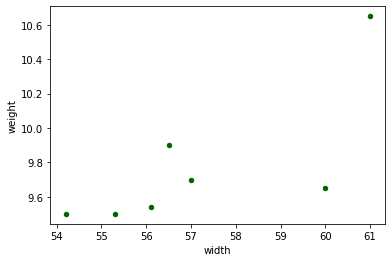

In [2]:
watermellons = pd.DataFrame({"width":[57,55.3,54.2,56.1,61,60,56.5],
                            "weight": [9.7,9.5,9.5,9.54,10.65,9.65,9.9]
                            })
print(watermellons)
plt = watermellons.plot.scatter(x='width',y='weight',c='darkgreen')

<AxesSubplot:xlabel='width', ylabel='weight'>

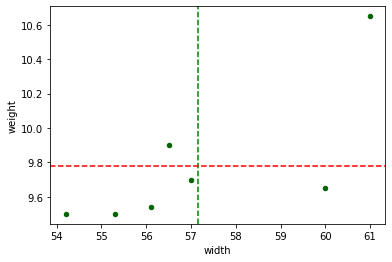

In [3]:
plt = watermellons.plot.scatter(x='width',y='weight',c='darkgreen')
plt.axvline(watermellons.width.mean(), color='g', linestyle='--')
plt.axhline(watermellons.weight.mean(), color='r', linestyle='--')
plt

Drawing the lines of the average width and height gives us a point through which all the regression line will have to go through. In the next step, let's compute the differences between our observations and these lines for each respective dimension.

We also add two more columns: 
1. $(width - meanwidth)^2$ 
2. $(width - meanwidth) * (weight - meanweight)$

In [4]:
watermellons['width_minus_width_mean'] = watermellons['width'] - watermellons.width.mean()
watermellons['weight_minus_weight_mean'] = watermellons['weight'] - watermellons.weight.mean()
watermellons['width_minus_width_mean_squared'] = watermellons['width_minus_width_mean'] * watermellons['width_minus_width_mean']
watermellons['width_meanwidth_times_weight_meanweight'] = watermellons['width_minus_width_mean'] * watermellons['weight_minus_weight_mean']

watermellons

,width,weight,width_minus_width_mean,weight_minus_weight_mean,width_minus_width_mean_squared,width_meanwidth_times_weight_meanweight
0,57.0,9.70,-0.157143,-0.077143,0.024694,0.012122
1,55.3,9.50,-1.857143,-0.277143,3.448980,0.514694
2,54.2,9.50,-2.957143,-0.277143,8.744694,0.819551
3,56.1,9.54,-1.057143,-0.237143,1.117551,0.250694
4,61.0,10.65,3.842857,0.872857,14.767551,3.354265
5,60.0,9.65,2.842857,-0.127143,8.081837,-0.361449
6,56.5,9.90,-0.657143,0.122857,0.431837,-0.080735


What is $\beta_1$ ?

$\beta_1$ is the slope of our line, and $\beta_0$ is where the line intersects the y-axis. To find it we will need to divide the sum of the last two columns by each other. Where "width_minus_width_mean_squared" is the denominator and "width_meanwidth_times_weight_meanweight" the numerator

In [5]:
watermellons['width_meanwidth_times_weight_meanweight'].sum() / watermellons['width_minus_width_mean_squared'].sum()

0.12314294631710368

0.12314294631710368 is therefore the slope of our line, $\beta_1$.

How to get $\beta_0$ ?

watermellons.weight.mean() = $\beta_0$ + $\beta_1$ * watermellons.width.mean()

Re-arranging the terms and we know that $\beta_1$ is 0.12314.... :

$\beta_0$  = watermellons.weight.mean() -  0.12314294631710368 * watermellons.width.mean()


In [6]:
watermellons.weight.mean() - 0.12314294631710368 * watermellons.width.mean()

2.738643882646689

In [7]:
b0 = 2.738643882646689
b1 = 0.12314294631710368

Our final equation for our watermellon model is therefore:
    
$\hat{y}$ = 2.738643882646689 + 0.12314294631710368 * $watermellonwidth$

or, simplier yet:

$\hat{y}$ = 2.738 + 0.123 * $watermellonwidth$


This is the line that best describes our data as it minimizes the distance between itself and the observations.

Let's try it on a watermellon which is 58.5 cm wide
    

In [8]:
2.738643882646689 + 0.12314294631710368 * 58.5

9.942506242197254

Same as above, but rounded decimals:

In [9]:
2.738 + 0.123 * 58.5

9.9335

<AxesSubplot:xlabel='width', ylabel='weight'>

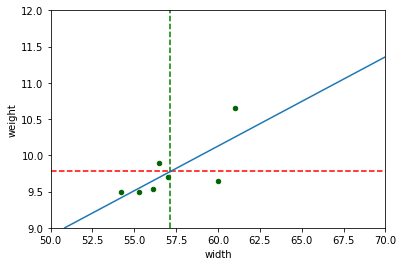

In [10]:
plt = watermellons.plot.scatter(x='width',y='weight',c='darkgreen')
plt.axvline(watermellons.width.mean(), color='g', linestyle='--')
plt.axhline(watermellons.weight.mean(), color='r', linestyle='--')
plt.axline((0, b0), slope=b1, color='C0')
plt.set_xlim([50,70])
plt.set_ylim([9,12])
plt

IMPORTANT NOTE

- $\beta_1$ is the slope of the line and as thus allows us to interpret the model that for every 1 cm increase in width, the weight  increases by 0.12314294631710368 kg. 

- Linear regression is highly interpretable.

## Assumptions of Linear Regression

In a real case scenario our linear regression model considers many more variables (independent variables) than just one as in the example above. 

$\hat{y}$ = $\beta_0$ + $\beta_1$ * $x_1$ + $\beta_2$ * $x_2$ + $\beta_3$ * $x_3$ + $\beta_4$ * $x_4$ + $\beta_5$ * $x_5$ ... + $\beta_n$ * $x_n$

Since the model is a linear regression it follows a couple of assumptions. These assumptions will work like our checklist for the modeling task.


1. Independent observations. Each datapoint is its own unique observation. 
2. No multicolinearity. The independent variables should not be highly correlated (0.7 threshold) with each other.
3. Homoscedasticity. The residuals $y$-$\hat{y}$ should be evenly distributed across all levels of the independent variables. No systematic increase or decrease should take place.
4. Normality. The residuals $y$-$\hat{y}$ are assumed to follow a normal distribution with a mean of 0 $\mathcal{N}(0\,\sigma^{2})\$
5. No influential outliers. Since modeling is about capturing general trends, we do not want extreme observations to influence the model.

### Generate dataset

In [11]:
np.random.seed(42)

# Generate the data
num_samples = 1000

# Independent variables
column1 = np.random.rand(num_samples)
column2 = column1 + np.random.normal(0, 0.1, num_samples)
column3 = np.random.rand(num_samples)
column4 = np.random.rand(num_samples) 
column5 = np.random.rand(num_samples)

# Dependent variable (target)
target = 2 * column1 + 3 * column2 + 4 * column3 + 5 * column4 + np.random.normal(0, 0.5, num_samples)

# Create the DataFrame
df = pd.DataFrame({'Column1': column1,
                   'Column2': column2,
                   'Column3': column3,
                   'Column4': column4,
                   'Column5': column5,
                   'Target': target})

num_extreme_obs = 5

extreme_column1 = np.random.uniform(low=-10, high=10, size=num_extreme_obs)
extreme_column2 = np.random.uniform(low=-10, high=10, size=num_extreme_obs)
extreme_column3 = np.random.uniform(low=-10, high=10, size=num_extreme_obs)
extreme_column4 = np.random.uniform(low=-10, high=10, size=num_extreme_obs)
extreme_column5 = np.random.uniform(low=-10, high=10, size=num_extreme_obs)
extreme_target = np.random.uniform(low=-100, high=100, size=num_extreme_obs)

# Create the extreme observations DataFrame
obs = pd.DataFrame({'Column1': extreme_column1,
                    'Column2': extreme_column2,
                    'Column3': extreme_column3,
                    'Column4': extreme_column4,
                    'Column5': extreme_column5,
                    'Target': extreme_target})

# Append the extreme observations to the original DataFrame
df = pd.concat([df, obs], ignore_index=True)
df

,Column1,Column2,Column3,Column4,Column5,Target
0,0.374540,0.392310,0.971533,0.387826,0.871913,7.890446
1,0.950714,0.817180,0.331347,0.803538,0.576982,9.441438
2,0.731994,0.770014,0.482041,0.901774,0.345481,9.787884
3,0.598658,0.659717,0.196098,0.203473,0.803012,4.685769
4,0.156019,0.211998,0.610780,0.066974,0.540279,3.486639
...,...,...,...,...,...,...
1000,-8.429803,-4.586328,4.791265,-9.017032,-2.319619,-49.600356
1001,7.625161,-2.590171,-8.267605,-6.178757,7.087990,84.151290
1002,-8.442420,1.378428,3.383083,5.810272,4.979980,16.317768
1003,4.136072,7.634179,-1.793926,-0.920823,-4.553692,6.696042


### Independence

In our toy example we can assume we didn't collect the same observation twice over different periods of time.

### No multicolinearity - anything above 0.7 or below -0.7 ?

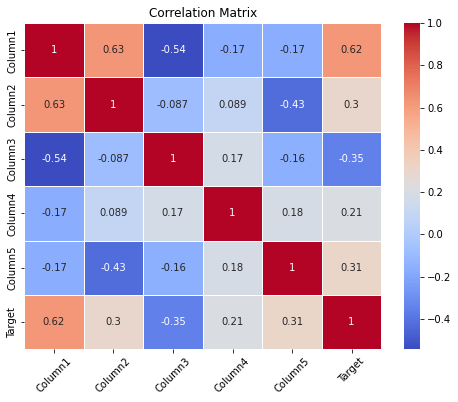

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def corr_matrix(df):
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create the correlation matrix heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)

    # Set the title
    ax.set_title('Correlation Matrix')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()
    
corr_matrix(df)

### Normality

In [13]:
from scipy import stats

def test_normality(df):
    # Calculate the residuals
    X = df[['Column1', 'Column2', 'Column3', 'Column4', 'Column5']]
    y = df['Target']
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    residuals = y - y_pred

    # Perform Shapiro-Wilk test for normality
    statistic, p_value = stats.shapiro(residuals)

    # Set the significance level
    alpha = 0.05

    # Check the null hypothesis
    if p_value > alpha:
        print("Residuals are normally distributed (fail to reject H0)")
    else:
        print("Residuals are not normally distributed (reject H0)")
        
test_normality(df)

Residuals are not normally distributed (reject H0)


### No influential outliers

In [14]:
df.mean()

Column1    0.491091
Column2    0.508279
Column3    0.487984
Column4    0.476405
Column5    0.491908
Target     6.940798
dtype: float64

In [15]:
df.median()

Column1    0.497249
Column2    0.504692
Column3    0.487628
Column4    0.487834
Column5    0.485230
Target     6.883165
dtype: float64

In [16]:
df.max()

Column1     8.400763
Column2     8.838112
Column3     4.791265
Column4     5.810272
Column5     7.087990
Target     84.151290
dtype: float64

In [17]:
df.min()

Column1    -8.442420
Column2    -4.586328
Column3    -8.267605
Column4    -9.017032
Column5    -7.649963
Target    -49.600356
dtype: float64

In [18]:
# Set the z-score threshold for outlier detection
zscore_threshold = 2.5

# Calculate the z-scores for each column in the DataFrame
z_scores = (df - df.mean()) / df.std()

# Find outliers by checking if the absolute z-score exceeds the threshold
outliers = np.where(np.abs(z_scores) > zscore_threshold)

# Remove outliers from the DataFrame
df_no_outliers = df.drop(outliers[0])

<AxesSubplot:xlabel='Column1', ylabel='Column3'>

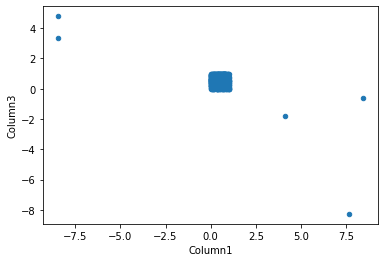

In [19]:
df.plot.scatter(x='Column1',y='Column3')

### Homoscedasticity

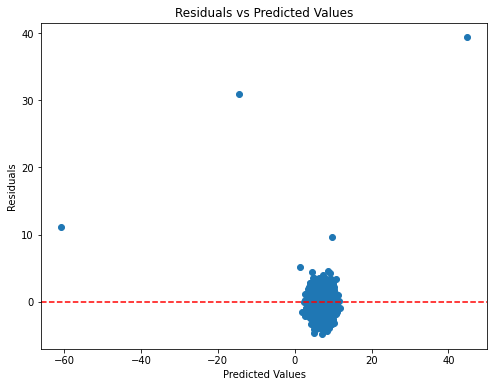

In [20]:
def homoscedasticity(df):
    # Fit the linear regression model and obtain residuals
    X = df[['Column1', 'Column2', 'Column3', 'Column4', 'Column5']]
    y = df['Target']
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    residuals = y - y_pred

    # Plot the residuals against the predicted values
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(y_pred, residuals)
    ax.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

    # Set labels and title
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.set_title('Residuals vs Predicted Values')

    # Show the plot
    plt.show()

homoscedasticity(df)

### Let's try that again now

#### No multicolinearity

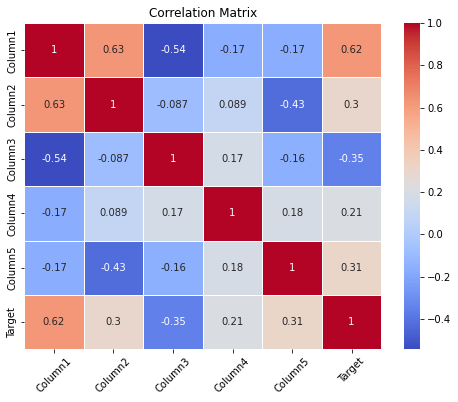

In [21]:
#before
corr_matrix(df)

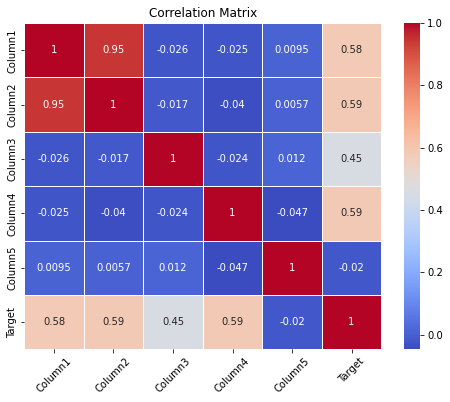

In [22]:
#after
corr_matrix(df_no_outliers)

Action: Remove one of the correlated variables or combine them together into one.

#### Homoscedasticity

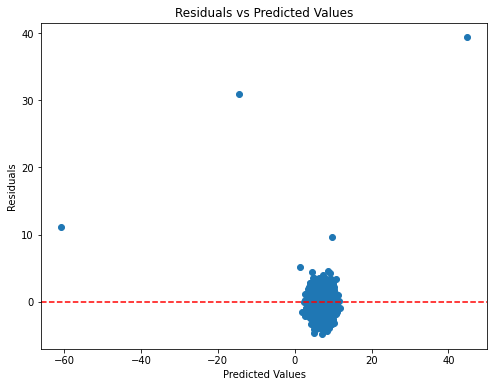

In [23]:
#before
homoscedasticity(df)

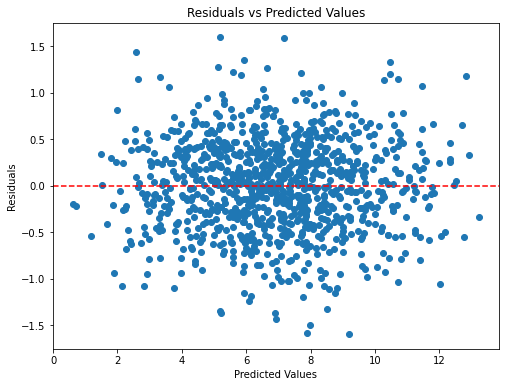

In [24]:
#after
homoscedasticity(df_no_outliers)

Action: With outliers removed we can observe the pattern better and notice that there is no systematic decrease or increase across the different predicted values. We do not need to do anything. 

In case this wouldn't be the case we'd have to include a new variable to help explain the systematic increase/decrease, create new features, transform features accounting for non-linear effects.

Example of how heteroscedasticity looks like:

<img src="imgs/heteroscedasticity.png" style="width: 400px;">

Another example 

In [25]:
import pandas as pd
import random

random.seed(42)

# Generate random data for the dataset
data = []
for _ in range(1000):
    income = random.randint(50000, 500000)
    high_net = random.choice([0, 1])  # Randomly assign high net status

    # Generate spending based on high net status using Gaussian distributions
    if high_net:
        spending = int(max(100000, random.gauss(250000, 50000)))
    else:
        spending = int(max(5000, random.gauss(35000, 10000)))

    data.append([income, spending, high_net])

# Create the pandas DataFrame
columns = ['income', 'spending', 'high_net_individual']
hni_df = pd.DataFrame(data, columns=columns)

# Display the first few rows of the dataset
hni_df.head()

,income,spending,high_net_individual
0,385243,42921,0
1,167026,36255,0
2,436123,25619,0
3,95580,155466,1
4,66663,41052,0


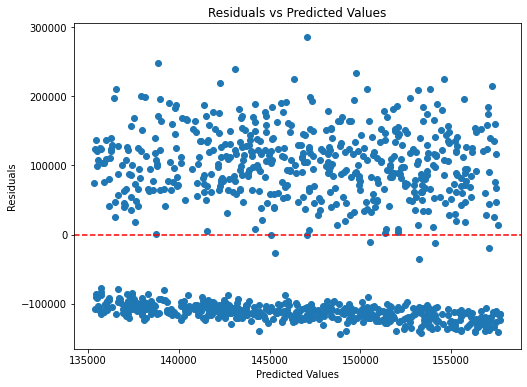

In [26]:
X = hni_df[['income']] #,'high_net_individual'
y = hni_df['spending']
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)
residuals = y - y_pred

# Plot the residuals against the predicted values
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_pred, residuals)
ax.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0

# Set labels and title
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Predicted Values')

# Show the plot
plt.show()

#### Normality

In [27]:
#before
test_normality(df)

Residuals are not normally distributed (reject H0)


In [28]:
#after
test_normality(df_no_outliers)

Residuals are normally distributed (fail to reject H0)


Action: None needed. With the removal of outliers the distributions are normal.

#### No influential outliers

<AxesSubplot:xlabel='Column1', ylabel='Column3'>

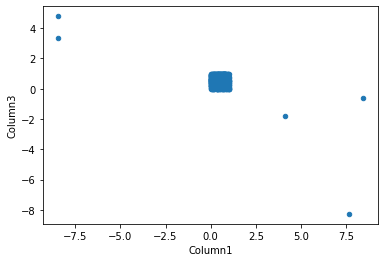

In [29]:
#before
df.plot.scatter(x='Column1',y='Column3')

<AxesSubplot:xlabel='Column1', ylabel='Column3'>

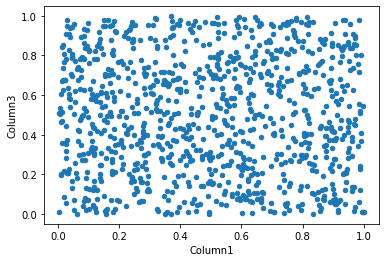

In [30]:
#after
df_no_outliers.plot.scatter(x='Column1',y='Column3')

Action: None. We have removed the outliers.

### Compare the linear regression equations

In [31]:
naive_model = LinearRegression().fit(df[['Column1', 'Column2', 'Column3', 'Column4', 'Column5']], df['Target'])
naive_model_no_outliers = LinearRegression().fit(df_no_outliers[['Column1', 'Column2', 'Column3', 'Column4', 'Column5']], df_no_outliers['Target'])
better_model = LinearRegression().fit(df_no_outliers[['Column1', 'Column3', 'Column4', 'Column5']], df_no_outliers['Target'])
best_model_no_outliers = LinearRegression().fit(df_no_outliers[['Column1', 'Column3', 'Column4']], df_no_outliers['Target'])
best_model = LinearRegression().fit(df[['Column1', 'Column3', 'Column4']], df['Target'])

In [32]:
def print_equation(model,X):
    coefficients = model.coef_
    intercept = model.intercept_

    # Create the equation string
    equation = 'Target = {:.2f}'.format(intercept)
    for i, coef in enumerate(coefficients):
        equation += ' + {:.2f} * {}'.format(coef, X.columns[i])

    # Print the equation
    print("Linear Regression Equation:")
    print(equation)
    
    
def rsquared(df,model,variables):
    return round(r2_score(df['Target'], model.predict(df[variables])),2)

### Results and R-squared

<img src="imgs/metric_r2.png" style="width: 200px;">

In [33]:
# Pseudo-code
# mean_y_true = np.mean(y_true)
# tss = np.sum((y_true - mean_y_true)**2)
# rss = np.sum((y_true - y_pred)**2)

Measures how well can the model explain the variance in the data = how well it describes it/predicts. 

- 0 indicates that the model has 0 power of explanation
- 1 indicates the model can explain the entire variability

Example:

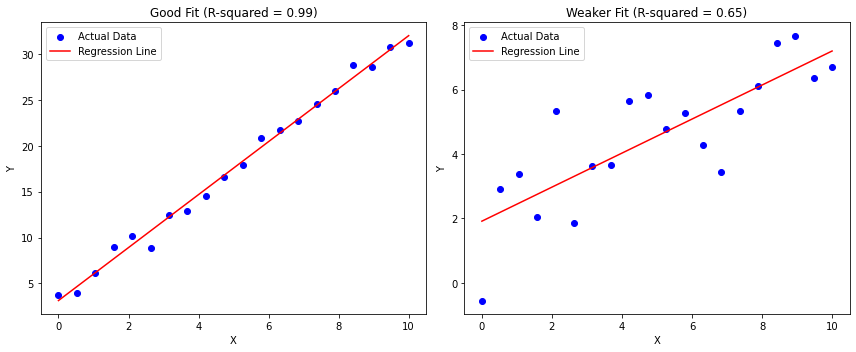

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate random data for the first plot
np.random.seed(0)
x_good = np.linspace(0, 10, 20)
y_good = 3 * x_good + 2 + np.random.normal(0, 1, 20)

# Fit a linear regression model to the data
model_good = LinearRegression()
model_good.fit(x_good.reshape(-1, 1), y_good)
y_pred_good = model_good.predict(x_good.reshape(-1, 1))

# Calculate R-squared for the first plot
r2_good = r2_score(y_good, y_pred_good)

# Generate random data for the second plot
x_weak = np.linspace(0, 10, 20)
y_weak = 0.5 * x_weak + 2 + np.random.normal(0, 1, 20)

# Fit a linear regression model to the data
model_weak = LinearRegression()
model_weak.fit(x_weak.reshape(-1, 1), y_weak)
y_pred_weak = model_weak.predict(x_weak.reshape(-1, 1))

# Calculate R-squared for the second plot
r2_weak = r2_score(y_weak, y_pred_weak)

# Create the first plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_good, y_good, color='blue', label='Actual Data')
plt.plot(x_good, y_pred_good, color='red', label='Regression Line')
plt.title(f'Good Fit (R-squared = {r2_good:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Create the second plot
plt.subplot(1, 2, 2)
plt.scatter(x_weak, y_weak, color='blue', label='Actual Data')
plt.plot(x_weak, y_pred_weak, color='red', label='Regression Line')
plt.title(f'Weaker Fit (R-squared = {r2_weak:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

#### naive_model

In [35]:
print_equation(naive_model,df[['Column1', 'Column2', 'Column3', 'Column4', 'Column5']])

Linear Regression Equation:
Target = 1.65 + 5.41 * Column1 + -0.65 * Column2 + 1.08 * Column3 + 1.99 * Column4 + 3.03 * Column5


In [36]:
rsquared(df,naive_model,['Column1', 'Column2', 'Column3', 'Column4', 'Column5'])

0.64

#### naive_model_no_outliers

In [37]:
print_equation(naive_model_no_outliers,df_no_outliers[['Column1', 'Column2', 'Column3', 'Column4', 'Column5']])

Linear Regression Equation:
Target = -0.02 + 1.95 * Column1 + 3.03 * Column2 + 3.93 * Column3 + 5.09 * Column4 + -0.00 * Column5


In [38]:
rsquared(df_no_outliers,naive_model_no_outliers,['Column1', 'Column2', 'Column3', 'Column4', 'Column5'])

0.96

Comment: Good fit, pay attention to the formula.

#### better_model

In [39]:
print_equation(better_model,df_no_outliers[['Column1', 'Column3', 'Column4', 'Column5']])

Linear Regression Equation:
Target = 0.06 + 4.93 * Column1 + 3.95 * Column3 + 5.04 * Column4 + -0.02 * Column5


In [40]:
rsquared(df_no_outliers,better_model,['Column1', 'Column3', 'Column4', 'Column5'])

0.94

#### best_model_no_outliers

In [41]:
print_equation(best_model_no_outliers,df_no_outliers[['Column1', 'Column3', 'Column4']])

Linear Regression Equation:
Target = 0.05 + 4.93 * Column1 + 3.95 * Column3 + 5.04 * Column4


In [42]:
rsquared(df_no_outliers,best_model_no_outliers,['Column1', 'Column3', 'Column4'])

0.94

Comment: Removing two variables yields still really good results.

#### "best_model"

In [43]:
print_equation(best_model,df[['Column1', 'Column3', 'Column4']])

Linear Regression Equation:
Target = 3.99 + 4.12 * Column1 + -0.48 * Column3 + 2.43 * Column4


In [44]:
rsquared(df,best_model,['Column1', 'Column3', 'Column4'])

0.49

Comment: Trying to replicate the 3 variable model but with the entire dataset (including outliers) yields a bad fit.

True formula:

<b><i>target = 2 * column1 + 3 * column2 + 4 * column3 + 5 * column4 + np.random.normal(0, 0.5, num_samples) </b></i>

In [45]:
# target = 2 * column1 + 3 * column2 + 4 * column3 + 5 * column4 + np.random.normal(0, 0.5, num_samples)

Linear regression works for very well for modeling phenomenons that are linear in nature as the example above. Capturing complex relationships is not possible, unless you create non-linear features(variables) to your model which typically means you are aware of the interaction between the variables. Linear regression also assumes a few things about the data which we covered above.

The earliest mention of the term "regression" comes from the 19th century where the polymath Sir Francis Galton created a model to describe the relationship between parents height and their children. 

For the curious reader: <a href="https://select-statistics.co.uk/blog/regression-to-the-mean-as-relevant-today-as-it-was-in-the-1900s/">Galtons study</a>

We will get into more nuance regarding linear regression later on in the class.

# Back to slides

## Decision Tree Regression

<img src="./imgs/dt_plot1.png" alt="Drawing" style="width: 400px;"/>


Imagine a dataset coming from a factory consisting of 3 variables. Let the x-axis be something like "number of packages a machine produces"(measured in thousands) and the y-axis "acidity of the product" (chemical pH). One is related to "mechanical wear", the other to "chemical wear". Our device gets damaged along its lifetime and we want to define what is the level of damage in any point in time. The other column in the dataset would be exactly that - wear measured by an expert at different points in time in the usage of the components in question. 

In [46]:
ds = pd.DataFrame({
    'packages_produced': random.sample(range(3000, 8000), 500),
    'acidity_level': np.random.randint(14, size=500).tolist()
})
ds['wear'] = 0
ds['packages_produced'] /= 1000 
ds.loc[ds['acidity_level'] >= 5.5,'wear'] = 22.3
ds.loc[(ds['acidity_level'] < 5.5) & (ds['packages_produced']>5300),'wear'] = 18.2 
ds.loc[(ds['acidity_level'] < 5.5) & (ds['packages_produced']<=5300) ,'wear'] = 15.4
ds['wear'] += np.random.normal(0, 2, 500) # let's add some noise to make the data less perfect ;-)
ds

,packages_produced,acidity_level,wear
0,6.624,3,17.687336
1,4.779,5,15.023887
2,3.710,12,24.793562
3,3.823,9,21.792233
4,4.146,10,20.559648
...,...,...,...
495,4.556,9,23.843525
496,6.352,5,15.189202
497,7.539,5,20.405291
498,7.424,1,15.925591


A decision tree is defined by how deep and complex rules it is allowed to create. With maximal complexity every data point becomes its own rule and with minimal we are unable to capture the essence. Let's picture an conceptual example where we allow the tree to create 3 rules.

Each of the rule will cut the 2-d space in two defined as "above" and "below" that value. 

How are the cuts defined? There are a number of criterions that can be chosen, but basically it aims at minimizing the dispersion of the data in each of the cuts. Further details can be found in the documentation of the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">Scikit-learn implementation of the Decision Tree for Regression</a>.

Is the acidity below 5.5 ?

<img src="./imgs/dt_plot2.png" alt="Drawing" style="width: 400px;"/>


Additionally, is the number of packages produced above 5.3 k ?

<img src="./imgs/dt_plot3.png" alt="Drawing" style="width: 400px;"/>


<img src="./imgs/dt_plot4.png" alt="Drawing" style="width: 400px;"/>


Finally, we add the green color for the case when the acidity is above or equal to 5.5.

The final tree can be visualized with the following rules and show the terminal values at the leafs presenting the value the regressor would output at prediction. Those values are the averages within the area that the rules cover. 

<img src="./imgs/dt_plot5.png" alt="Drawing" style="width: 400px;"/>

We could possibly obtain better results by allowing more splits making the model more complex and risking overfitting it. Overfitting happens when your model adapts too much to the peculiarities of the data seen during training and does not capture the general trend for a phenomenon. 

<img src="./imgs/overfitting.png" alt="Drawing" style="width: 400px;"/>

Something worth noting is that this example aims at presenting non-linear effects where combinations of variables together make a difference, requiring the space to be 'cut' in several regions. A linear model wouldn't be able to capture these relationships  well.

IMPORTANT NOTE

- Decision Tree is a non-linear algorithm
- The Decision Tree is highly interpretable

## Random Forest Regressor

As surprising as it may sound like - a forest is a set of many trees like those above. If we picture the previous scenario and imagine we are adding more trees on top of that, it implies adding more rules in parallel onto the same space.

<img src="./imgs/dt_plot6.png" alt="Drawing" style="width: 400px;"/>

<img src="./imgs/dt_plot7.png" alt="Drawing" style="width: 400px;"/>

<img src="./imgs/dt_plot8.png" alt="Drawing" style="width: 400px;"/>

The image becomes messy, so instead of adding more layers of rules let's instead imagine this. If we have 10 trees, each one would create a unique set of rules like the one drawn out before. One of the other trees could look like this:

<img src="./imgs/dt_plot9.png" alt="Drawing" style="width: 400px;"/>

Previous decision tree:

<img src="./imgs/dt_plot5.png" alt="Drawing" style="width: 400px;"/>

The cut points are different despite the number of cuts coincides (similiar tree complexity). With 10 trees in total of this type, we will want the model to return a single value for every data point instead of 10 as the case would be in case we would have 10 Tree models instead of 1 Random Forest model. These 10 values can be seen as outputs from 10 separate experts. To agree on a final verdict they will need to take the mean, median, min or max of those predictions. For regression - most commonly the mean is used, as this choice considers outliers not to be a problem and each data point to have equal importance.

For the curious reader: <a href="https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf">Paper on Random Forests</a>

IMPORTANT NOTE

- Random Forest is an ensamble model consisting of 2 or more Decision Trees
- As much as each tree is highly interpretable, the Random Forest model is not

## Summary

We covered:
- Linear Regression and its assumptions
- Decision Trees
- Random Forest

# Q & A

# Part II: 
    - Facts about the dataset
    - Exploratory data analysis
    - Model training

# Part III: 
    - Discussing evaluation metrics
    - The right choice of metric for our problem and results
    - Diagnosing problems in our models
    - End survey